In [14]:
# Make sure we've got the latest version of fastai:
# !pip install -Uqq fastai gradio nbdev

In [2]:
#|default_exp app

In [3]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(): return x[0].isupper()

/Users/pqrsjk/venv-for-jupyter/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


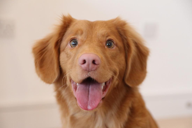

In [4]:
im = PILImage.create('dog.jpg')
im.thumbnail((192, 192))
im

In [5]:
#|export
learn = load_learner('model.pkl')

In [6]:
# %time learn.predict(im)
learn.predict(im)

('False', tensor(0), tensor([9.9999e-01, 6.6963e-06]))

In [7]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred, id, prob = learn.predict(img)
    return dict(zip(categories, map(float, prob)))

In [8]:
classify_image(im)

{'Dog': 0.9999933242797852, 'Cat': 6.696266609651502e-06}

In [12]:
#|export
image = gr.components.Image(width=192, height=192)
label = gr.components.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

iface = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [16]:
import nbdev

In [18]:
nbdev.export.nb_export('test_hugging_face.ipynb', 'app')
print('Export successful')

Export successful
